In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

In [3]:
df=sm.datasets.macrodata.load_pandas().data

In [4]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [5]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [6]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [8]:
Index=pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3')) ##time series analysis

In [9]:
df.index=Index

In [10]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

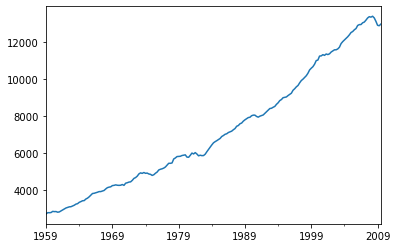

In [12]:
df['realgdp'].plot()

In [13]:
result=sm.tsa.filters.hpfilter(df['realgdp'])

In [14]:
type(result)

tuple

In [15]:
gdp_cycle,gdp_trend=sm.tsa.filters.hpfilter(df['realgdp'])

In [16]:
df['trend']=gdp_trend

<AxesSubplot:>

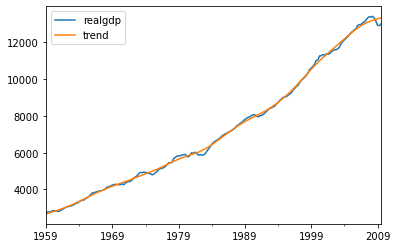

In [17]:
df[['realgdp','trend']].plot()

<AxesSubplot:>

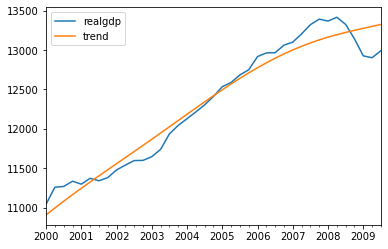

In [18]:
df[['realgdp','trend']]["2000-03-31":].plot()

### ETS theory
1. error-trend -seasonality
2. peaks and spikes-seasonality
3. simple moving average(smallerwindows-noise,might lag data at the v firstpt,does not realy inform about possible future behaviour,describes trends)
4. exponentially weighted moving avg(apply more weight to recent values



In [20]:
airline=pd.read_csv('airline_passengers.csv',index_col="Month")

In [21]:
airline.dropna(inplace=True)

In [22]:
airline.index=pd.to_datetime(airline.index)

In [23]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [24]:
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()

<AxesSubplot:xlabel='Month'>

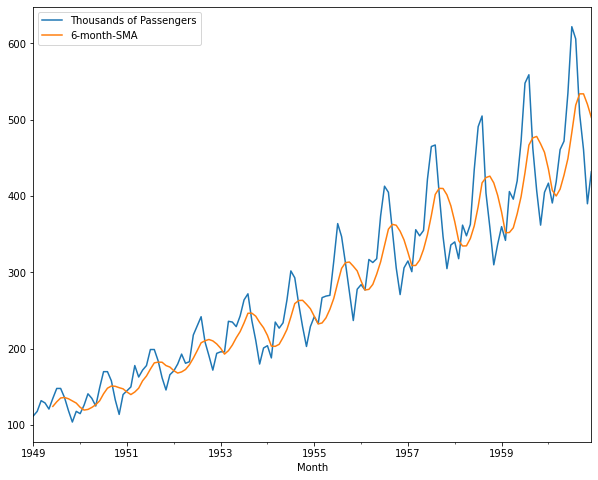

In [25]:
airline.plot(figsize=(10,8))

In [28]:
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

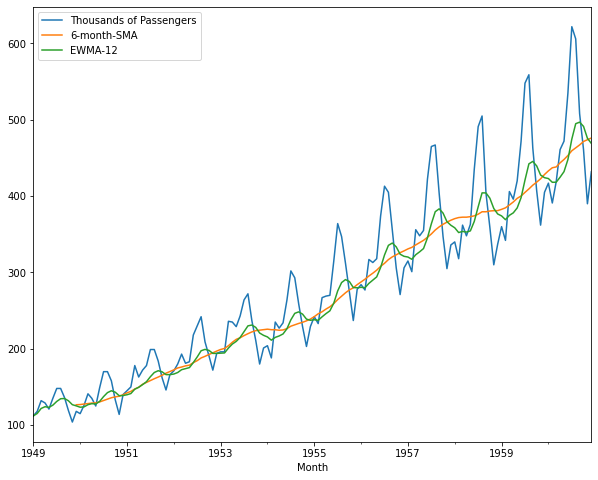

In [29]:
airline.plot(figsize=(10,8))

In [26]:
airline['EWMA-12']=airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

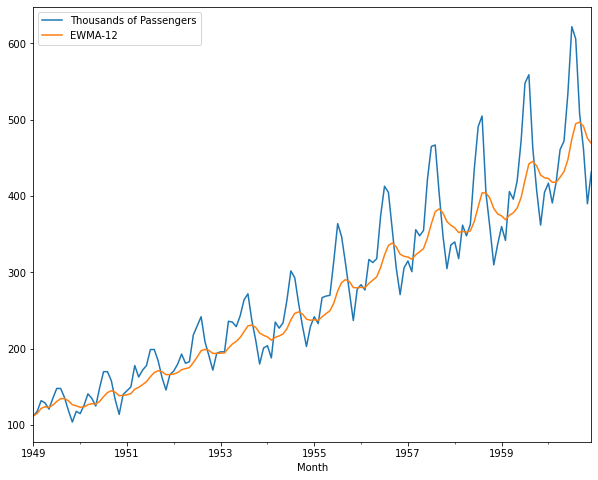

In [27]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(10,8))

1. span="nday ew moving average"
2. centre of mass =physical interprtation and c=(s-1)/2
3. alpha specifies the smoothing factor

In [32]:
airline.head()

,Thousands of Passengers,6-month-SMA,EWMA-12
Month,,,
1949-01-01,112.0,NaN,112.000000
1949-02-01,118.0,NaN,115.250000
1949-03-01,132.0,NaN,121.787529
1949-04-01,129.0,NaN,124.064224
1949-05-01,121.0,NaN,123.231685


In [33]:
airline=pd.read_csv('airline_passengers.csv',index_col='Month')

In [34]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


<AxesSubplot:xlabel='Month'>

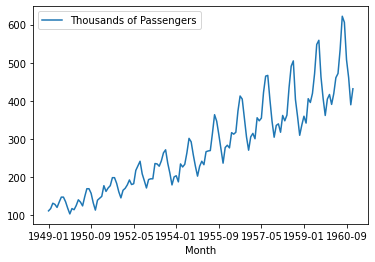

In [35]:
airline.plot() ##linear or exponential? use ETS

In [36]:
airline.dropna(inplace=True)


In [38]:
airline.index=pd.to_datetime(airline.index)

In [39]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [42]:
result=seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

<AxesSubplot:xlabel='Month'>

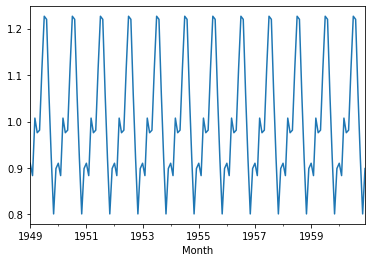

In [43]:
result.seasonal.plot()

<AxesSubplot:xlabel='Month'>

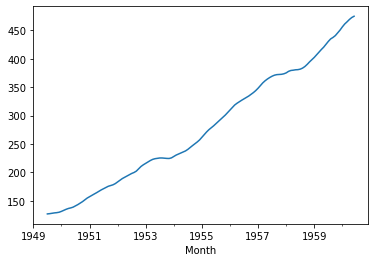

In [44]:
result.trend.plot()

In [45]:
result=seasonal_decompose(airline['Thousands of Passengers'],model='additive')

<AxesSubplot:xlabel='Month'>

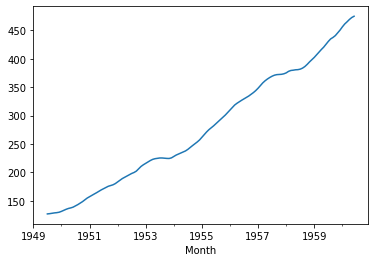

In [46]:
result.trend.plot()

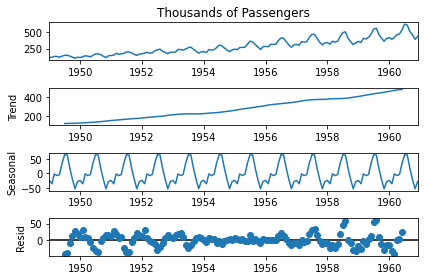

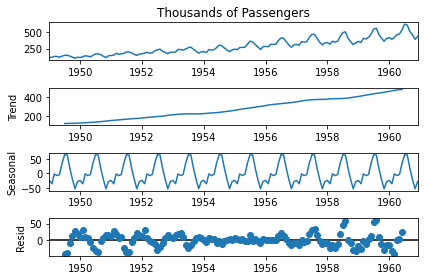

In [47]:
result.plot()

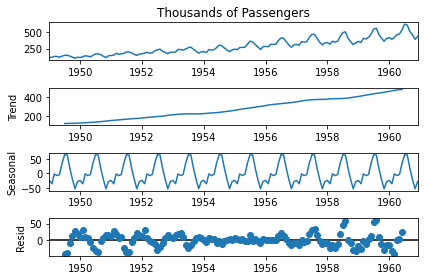

In [48]:
fig=result.plot()

#### 1. ARIMA - TWO TYPES, SEASONAL AND NON SEASONAL
2. ARIMA - APPLIED TO CASES WHERE DATA SHOW EVIDENCE OF NON-STATIONARY, INITIAL DIFFERNCING STEP(CORRESPONDING TO INTEGRTED PART OF THE MODEL)
3. NON-SEASONAL ARIMA - p,d,q are non negative integers
4. p- relationship bw curr observation and observations over a prev period
5. d - subtracting an obs from an obs at the prev time step in order to make time series stationary
6. q - moving avg- dependency bw an obs and residual error from a moving avg model applied to lagged obsvs
 
 
1. a stationary data - constant mean wrt to time and variance(hills and valleys) doesnt change wrt time

2. differencing- bringing the data to stationary to use the arima functions, every differencing comes at a cost of losing one row, which aint large if the there r many rows


#### 1. Auto-correlation plots-gradual decline, sharp drop off.
2. Partial Corelation plots-conditional corelation 
3. its the correlation bw 2 variables under assumption that we know and take into acc the values of some other set of variables
4. x1,x2,x3 - predictor variables, considering a regression context, y- response variable
5. auto-correltion, shows the correlation of the series itelf lagged by x time units.
6. so the y axis is the correlation and the x axix is the no. of time units of lag
partial correlation between variables determined into acc how both y and x3 are related to x1 and x2.
AR - ? OR MA-? OR BOTH (LESS COMMON )

### ARIMA CODE ALONG
1. visualise the time series data
2. make the time series data stationary
3. plot the correlation and autocorrelation charts
4. construct the arima model
5. use the model to make predictions

In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df=pd.read_csv('monthly-milk-production-pounds-p.csv')

In [53]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [54]:
df.columns=['Month','Milk in Pounds per Cow']

In [55]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [56]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [57]:
df.drop(168,axis=0,inplace=True)

In [58]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [59]:
df['Month']=pd.to_datetime(df['Month'])

In [60]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [61]:
df.set_index('Month',inplace=True)

In [62]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [63]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [64]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [ ]:
## Step 2

<AxesSubplot:xlabel='Month'>

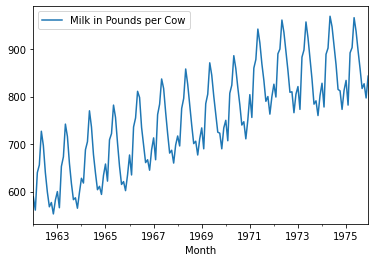

In [65]:
df.plot()

In [66]:
time_series=df['Milk in Pounds per Cow']

In [67]:
type(time_series) ##its converted to series instead of df

pandas.core.series.Series

<AxesSubplot:xlabel='Month'>

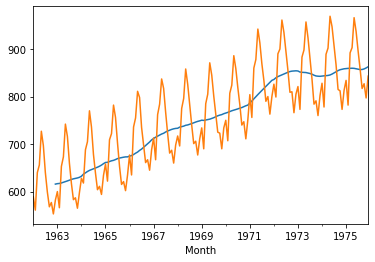

In [68]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.plot()

<AxesSubplot:xlabel='Month'>

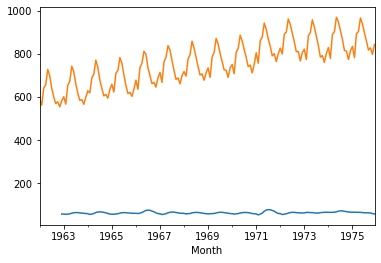

In [69]:
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()

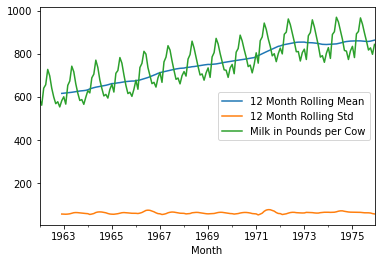

In [70]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std') ## if free-flat, means its good
time_series.plot()
plt.legend()

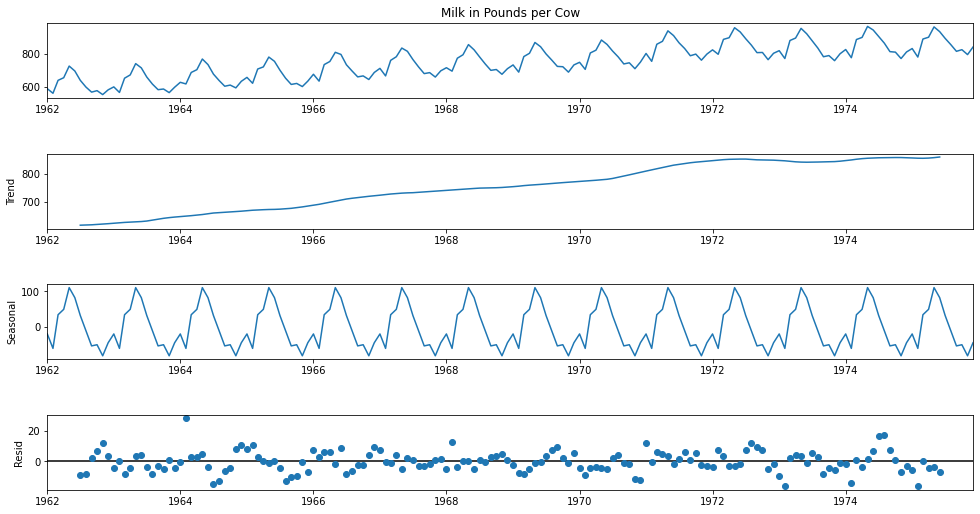

In [73]:
## error trend seasonality decomposoiton plot, sepearted the trend, seasonality and error 
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(time_series)
fig = decomp.plot()
fig.set_size_inches(15,8)

<ipython-input-78-c90c55d7ee76>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp=seasonal_decompose(time_series,freq=12) ## to tell pandas to get a seasonal data


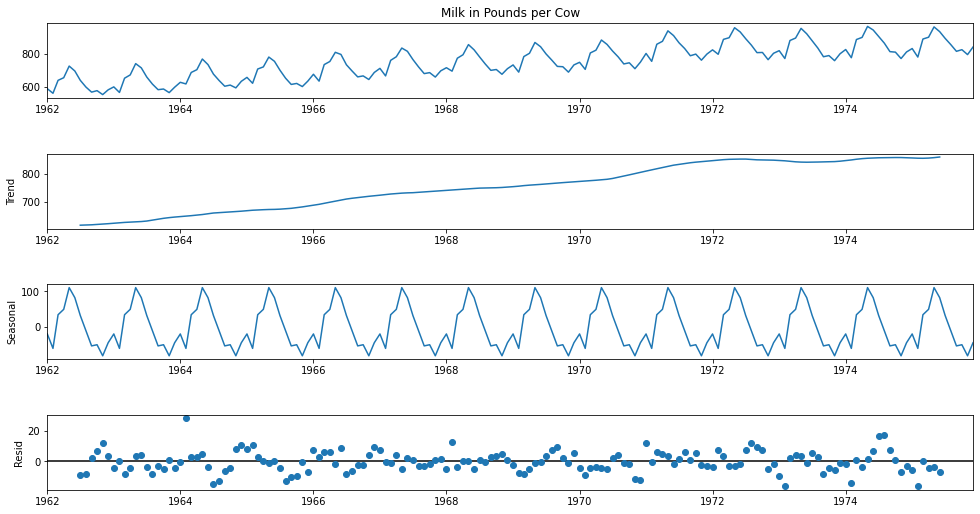

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(time_series,freq=12) ## to tell pandas to get a seasonal data
fig = decomp.plot()
fig.set_size_inches(15,8)

In [79]:
### test for stationary
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [80]:
from statsmodels.tsa.stattools import adfuller

In [82]:
result=adfuller(df['Milk in Pounds per Cow'])
result

(-1.3038115874221299,
 0.6274267086030314,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [83]:
def adf_check(time_series):
    result=adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels =['ADF Test Statistic','p-value','# of lags','Num of Observations used']
    
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis")
        print('reject null hypothesis')
        print("Data has no unit root and is stationary")
    else:
        print('weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')
        

In [84]:
adf_check(df['Milk in Pounds per Cow']) ##non-stationary so u need to do differencing

Augmented Dicky-Fuller Test
ADF Test Statistic:-1.3038115874221299
p-value:0.6274267086030314
# of lags:13
Num of Observations used:154
weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [91]:
df['First Difference']=df['Milk in Pounds per Cow']-df['Milk in Pounds per Cow'].shift(1)

<AxesSubplot:xlabel='Month'>

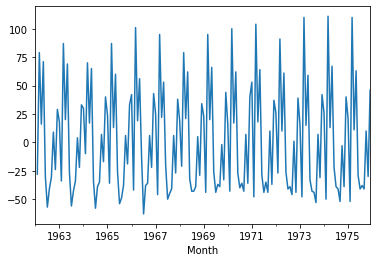

In [92]:
df['First Difference'].plot()

In [93]:
adf_check(df['First Difference'].dropna()) ##stationary achieved

Augmented Dicky-Fuller Test
ADF Test Statistic:-3.054995558653028
p-value:0.03006800400178912
# of lags:14
Num of Observations used:152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [94]:
df['Milk Second Difference']=df['First Difference']-df['First Difference'].shift(1)

In [96]:
adf_check(df['Milk Second Difference'].dropna()) ##not much of a difference

Augmented Dicky-Fuller Test
ADF Test Statistic:-14.32787364560343
p-value:1.1126989332079236e-26
# of lags:11
Num of Observations used:154
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

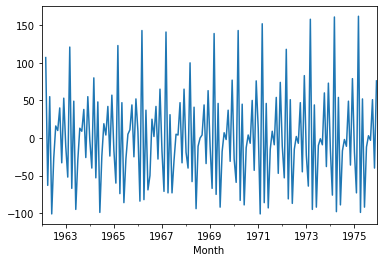

In [97]:
df['Milk Second Difference'].plot()

In [98]:
df['Seasonal Difference']=df['Milk in Pounds per Cow']-df['Milk in Pounds per Cow'].shift(12)

<AxesSubplot:xlabel='Month'>

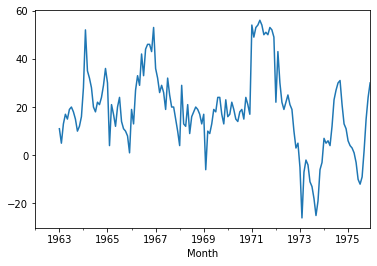

In [99]:
df['Seasonal Difference'].plot()

In [100]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-2.3354193143593993
p-value:0.16079880527711304
# of lags:12
Num of Observations used:143
weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [102]:
df['Seasonal First Difference']=df['First Difference']-df['First Difference'].shift(12)

<AxesSubplot:xlabel='Month'>

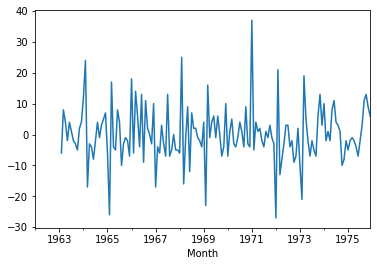

In [103]:
df['Seasonal First Difference'].plot()

In [105]:
adf_check(df['Seasonal First Difference'].dropna()) ## p value  is v low

Augmented Dicky-Fuller Test
ADF Test Statistic:-5.0380022749219755
p-value:1.865423431878904e-05
# of lags:11
Num of Observations used:143
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


#### Auto Corelation Plots

In [106]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

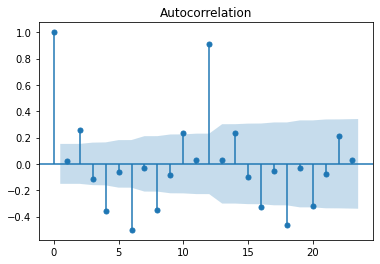

In [107]:
fig_first=plot_acf(df['First Difference'].dropna())

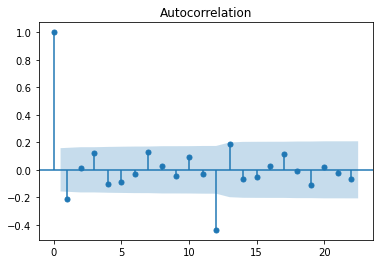

In [108]:
fig_seasonal_first=plot_acf(df['Seasonal First Difference'].dropna())

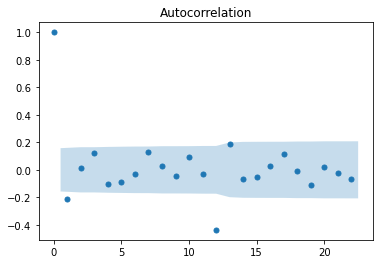

In [111]:
fig_seasonal_first=plot_acf(df['Seasonal First Difference'].dropna(),use_vlines=False)

In [ ]:
## pandas has acf, not pacf

In [109]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

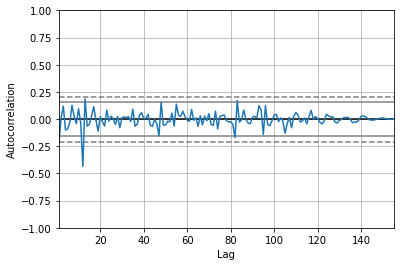

In [110]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

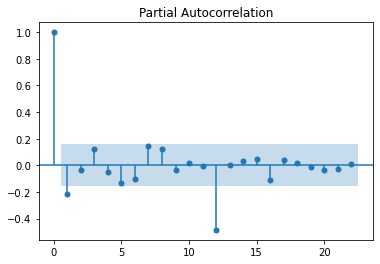

In [112]:
result=plot_pacf(df['Seasonal First Difference'].dropna())

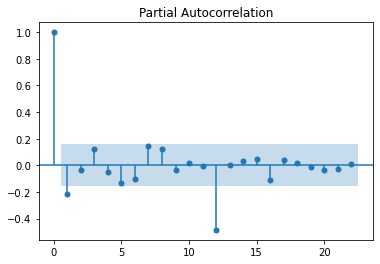

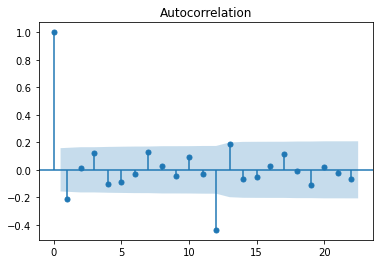

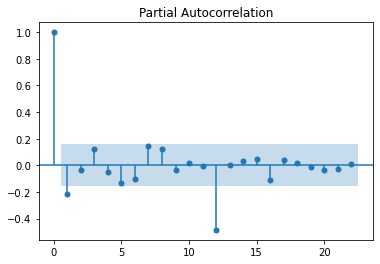

In [113]:
plot_acf(df['Seasonal First Difference'].dropna())
plot_pacf(df['Seasonal First Difference'].dropna())

In [114]:
from statsmodels.tsa.arima_model import ARIMA

In [115]:
help(ARIMA)   

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  .. deprecated:: 0.12
 |     Use statsmodels.tsa.arima.model.ARIMA instead
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M',

In [116]:
model=sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'],order=(0,1,0),seasonal_order=(1,1,1,12))

C:\Users\cheha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\cheha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [117]:
results=model.fit()

In [118]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Tue, 03 Aug 2021   AIC                           1074.131
Time:                                      15:04:45   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

In [120]:
results.resid ###error based on what it predict using our original data

Month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
                 ...    
1975-08-01      2.641352
1975-09-01      8.158628
1975-10-01      7.676815
1975-11-01      6.572470
1975-12-01      5.936378
Length: 168, dtype: float64

<AxesSubplot:xlabel='Month'>

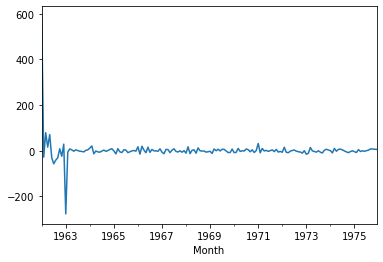

In [121]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

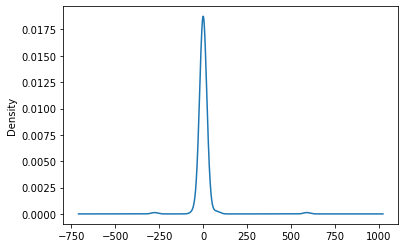

In [122]:
results.resid.plot(kind='kde')

<AxesSubplot:xlabel='Month'>

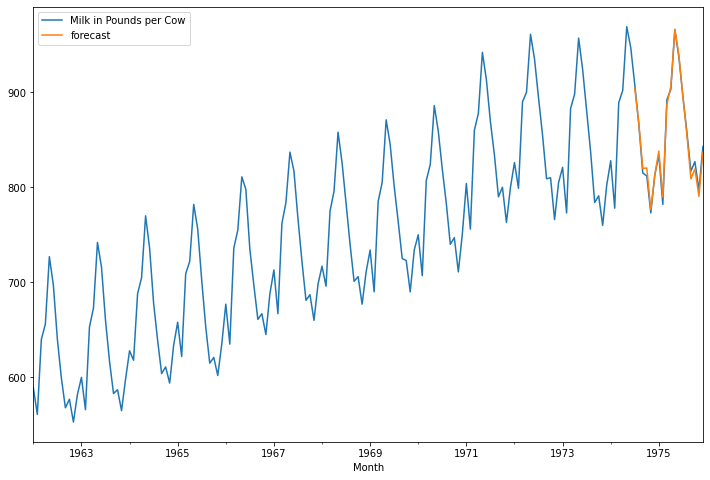

In [124]:
df['forecast']=results.predict(start=150,end=250)
df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))
## stopped having the datapoints towards the end

In [125]:
df.tail()

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841372
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [126]:
## create initial rows for future
from pandas.tseries.offsets import DateOffset

In [127]:
future_dates=[df.index[-1]+DateOffset(months=x) for x in range (1,24)]
##df.index[-1] ie last index value
## then adding months upto 2 more yrs, startingf from 1 to avoid repetition
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [128]:
future_df=pd.DataFrame(index=future_dates,columns=df.columns)

In [129]:
future_df

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
final_df =pd.concat([df,future_df])

In [131]:
final_df.tail()

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
final_df['forecast']=results.predict(start=168,end=192) ##end assumed

In [133]:
final_df.tail()

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525867
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918957
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881182
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027296
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962997


<AxesSubplot:>

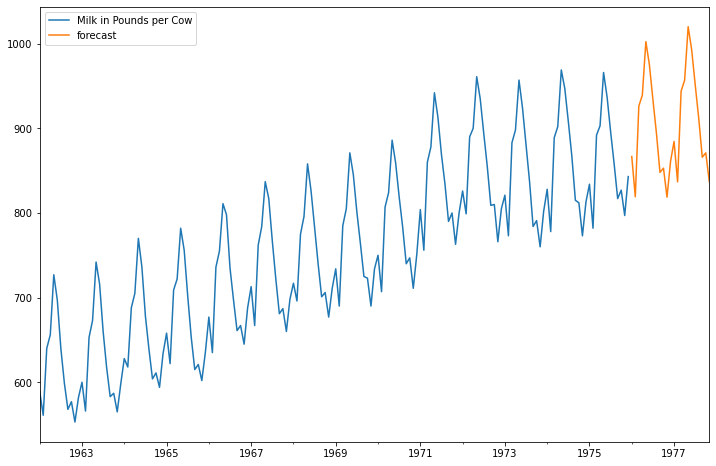

In [134]:
final_df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))

#### WHY NOT ARIMA?
1. lot of ARIMA models assume that y value is directly connected to time,not taking into acc the external factors